**21BAI1892**

Madhuri Santhosh Srinivasan

Link to github repository: https://github.com/madhurisanthoshs/Machine-Vision-Lab/blob/main/MV_AS_3.ipynb

## Lab Assigment 3

Libraries

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

Load Video

In [15]:
vid = r"C:\Users\santh\Videos\birb.mp4"
cap = cv2.VideoCapture(vid)
if not cap.isOpened():
    print("Not opened")
else:
    print("Opened")

Opened


Frame Extraction

In [16]:
frames = []
fc = 0
while True:
    ret, f = cap.read()
    if not ret:
        break
    frames.append(f)
    fc+=1
cap.release()
print(f"{fc}")

123


Spatio-Temporal Segmentation

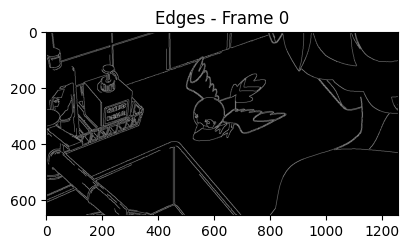

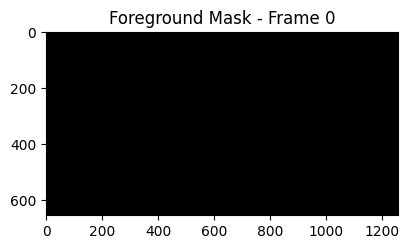

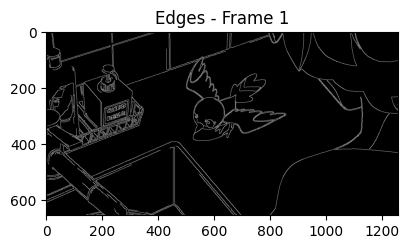

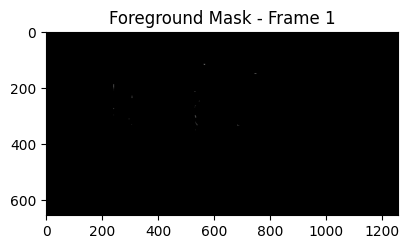

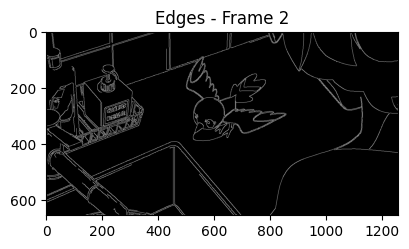

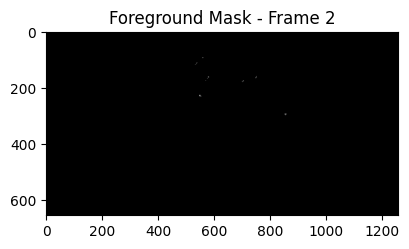

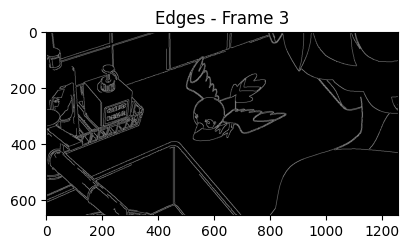

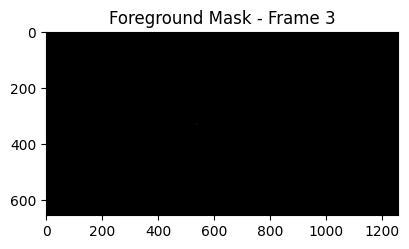

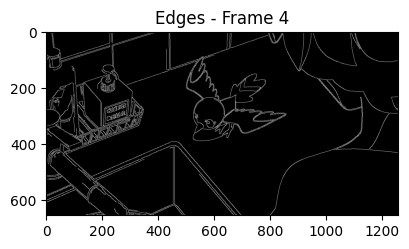

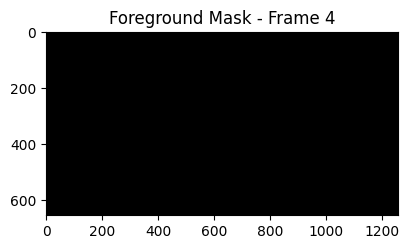

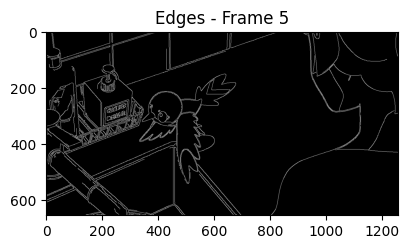

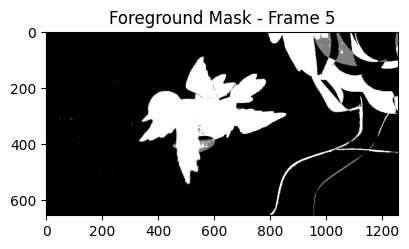

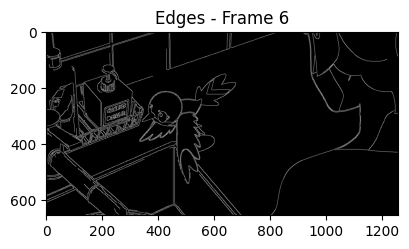

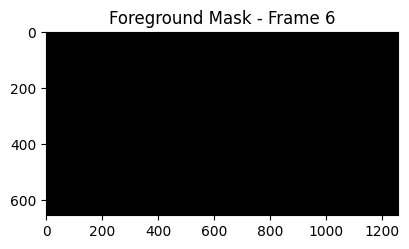

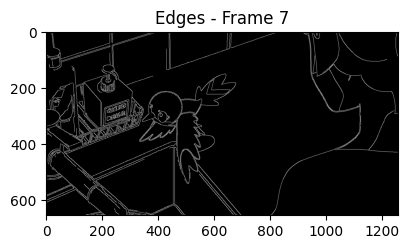

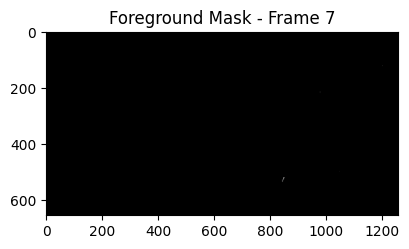

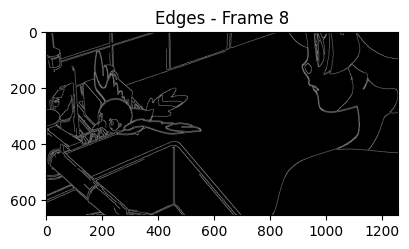

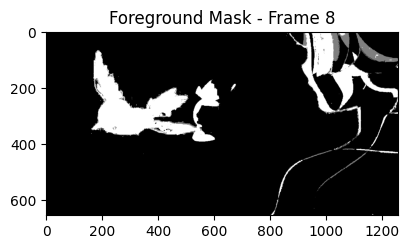

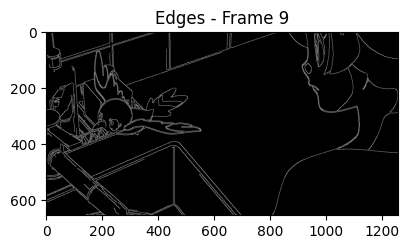

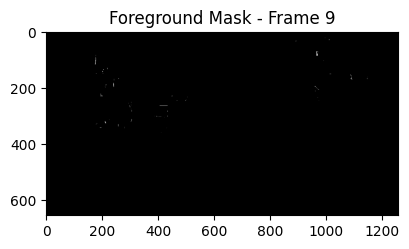

In [17]:
seg = []
bg = cv2.createBackgroundSubtractorMOG2()
for i, f in enumerate(frames):
    gr_f = cv2.cvtColor(f, cv2.COLOR_BGR2GRAY)
    ed = cv2.Canny(gr_f, 50, 150)
    fg = bg.apply(f)
    seg.append((ed, fg))
for i in range(0,10):
    e, fm = seg[i]
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.title(f'Edges - Frame {i}')
    plt.imshow(e, cmap='gray')
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,2)
    plt.title(f'Foreground Mask - Frame {i}')
    plt.imshow(fm, cmap='gray')

Scene Cut Detection

In [19]:
sc = []
prev = None
win = 10
diff = []
for i, f in enumerate(frames):
    hist = cv2.calcHist([f],[0],None,[256],[0,256])
    hist = cv2.normalize(hist,hist).flatten()
    if prev is not None:
        d = cv2.compareHist(prev, hist, cv2.HISTCMP_BHATTACHARYYA)
        diff.append(d)
        if d>0.1:
            sc.append(('Hard Cut',i))
        if len(diff)>=win:
            avg = np.mean(diff[-win])
            if 0.3<avg<=0.5:
                sc.append(('Soft Cut', i-win // 2))
    else:
        diff.append(0)
    prev = hist
print("Scene cuts:")
for ct, fn in sc:
    print(f"{ct} at frame {fn}")


Scene cuts:
Hard Cut at frame 15
Hard Cut at frame 53
Hard Cut at frame 54
Hard Cut at frame 57
Hard Cut at frame 60
Hard Cut at frame 66
Hard Cut at frame 68
Hard Cut at frame 69
Hard Cut at frame 71
Hard Cut at frame 72
Hard Cut at frame 74
Hard Cut at frame 75
Soft Cut at frame 70
Hard Cut at frame 76
Hard Cut at frame 78
Hard Cut at frame 80
Hard Cut at frame 81
Hard Cut at frame 83
Hard Cut at frame 84
Hard Cut at frame 86
Hard Cut at frame 87
Hard Cut at frame 90
Hard Cut at frame 96
Hard Cut at frame 99
Hard Cut at frame 102
Hard Cut at frame 106
Hard Cut at frame 107
Hard Cut at frame 108
Hard Cut at frame 110
Hard Cut at frame 111
Hard Cut at frame 112
Hard Cut at frame 113
Hard Cut at frame 114
Hard Cut at frame 116
Hard Cut at frame 117
Hard Cut at frame 118
Hard Cut at frame 119
Hard Cut at frame 120
Hard Cut at frame 121


Opened


Text(0.5, 1.0, 'Diff bw consecutive frames')

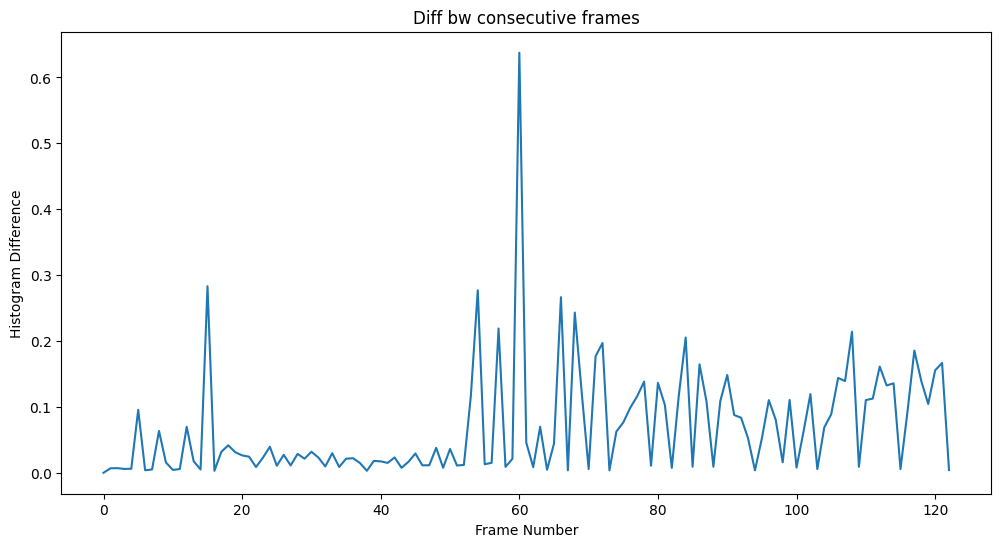

In [20]:
cap = cv2.VideoCapture(vid)

if not cap.isOpened():
    print("Not opened")
else:
    print("Opened")

fc = 0
prev = None
diff = []
while True:
    ret, f = cap.read()
    if not ret:
        break
    fc+=1
    gr = cv2.cvtColor(f,cv2.COLOR_BGR2GRAY)
    hist = cv2.calcHist([gr],[0],None,[256],[0,256])
    hist = cv2.normalize(hist,hist).flatten()
    if prev is not None:
        d = cv2.compareHist(prev, hist, cv2.HISTCMP_BHATTACHARYYA)
        diff.append(d)
    else:
        diff.append(0)
    prev = hist
cap.release()
plt.figure(figsize=(12,6))
plt.plot(diff, label="Histogram Differences")
plt.xlabel("Frame Number")
plt.ylabel("Histogram Difference")
plt.title("Diff bw consecutive frames")

In [21]:
md = np.mean(diff)
std = np.std(diff)
hc = md + 2*std
sc = md + std
print(f"{hc:.3f}")
print(f"{sc:.3f}")

0.240
0.154


In [22]:
st = []
for i, d in enumerate(diff):
    if d>hc:
        st.append(('Hard Cut', i))
    elif sc < d < hc:
        st.append(('Soft Cut', i))
print("Scene cuts:")
for ct, fn in st:
    print(f"{ct} at frame {fn}")

Scene cuts:
Hard Cut at frame 15
Hard Cut at frame 54
Soft Cut at frame 57
Hard Cut at frame 60
Hard Cut at frame 66
Hard Cut at frame 68
Soft Cut at frame 71
Soft Cut at frame 72
Soft Cut at frame 84
Soft Cut at frame 86
Soft Cut at frame 108
Soft Cut at frame 112
Soft Cut at frame 117
Soft Cut at frame 120
Soft Cut at frame 121


Mark the Scene cuts:

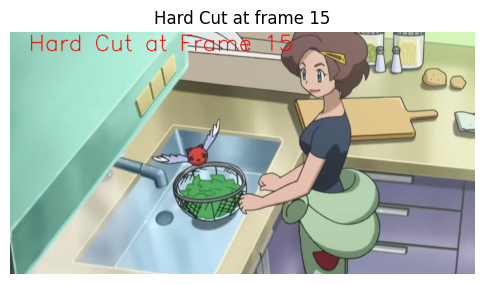

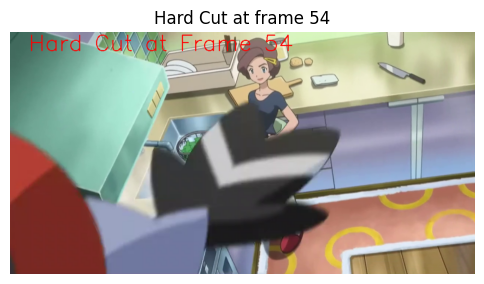

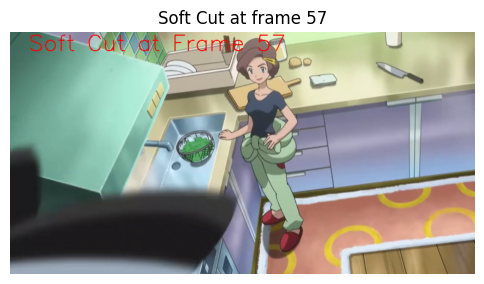

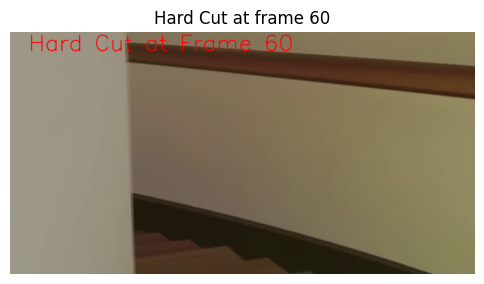

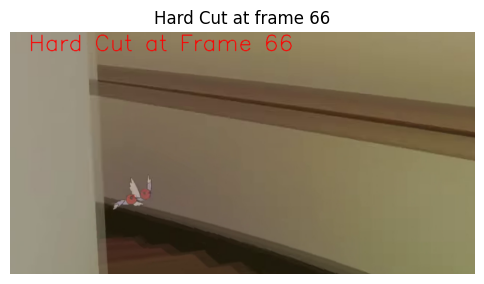

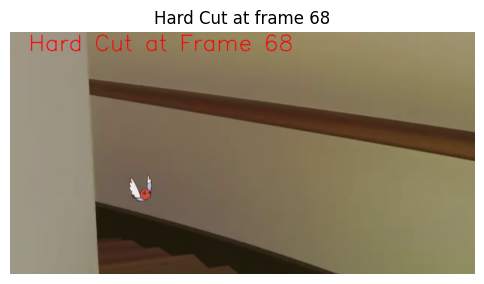

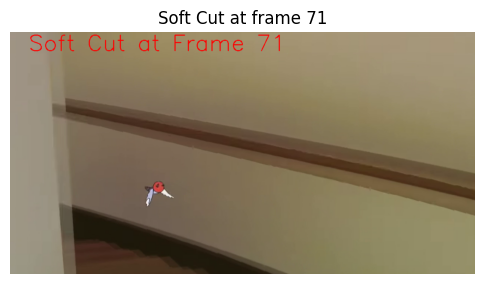

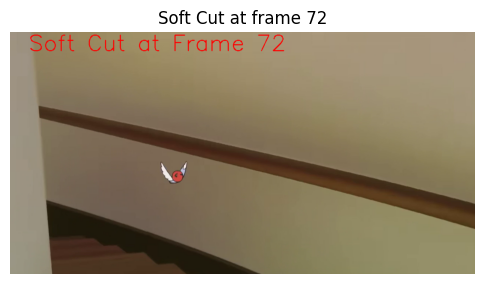

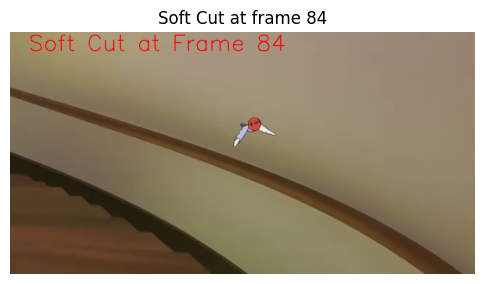

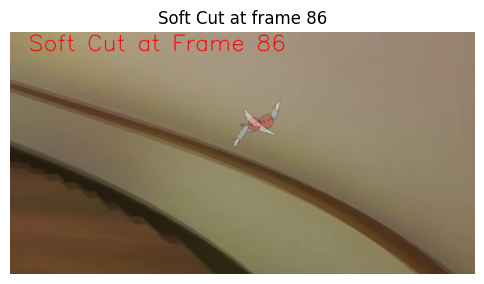

In [23]:
cap = cv2.VideoCapture(vid)
fwc = []
fi = 0
while True:
    ret, f = cap.read()
    if not ret:
        break
    for ct, cf in st:
        if fi==cf:
            af = f.copy()
            cv2.putText(af, f"{ct} at Frame {fi}", (50,50), cv2.FONT_HERSHEY_SIMPLEX, 2, (0,0,255),2)
            fwc.append((af, ct, fi))
            break
    fi+=1
cap.release()

for af, ct, fi in fwc[0:10]:
    plt.figure(figsize=(6,4))
    plt.title(f"{ct} at frame {fi}")
    plt.imshow(cv2.cvtColor(af, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

Results

Hard Cut
Hard Cut
Soft Cut
Hard Cut
Hard Cut
Hard Cut
Soft Cut
Soft Cut
Soft Cut
Soft Cut


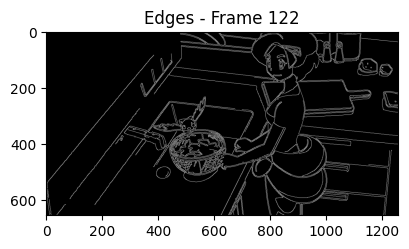

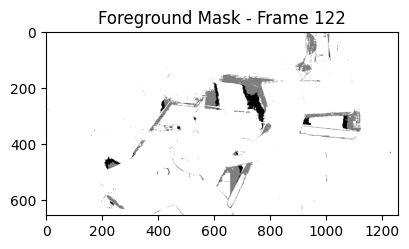

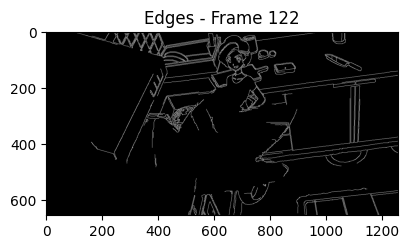

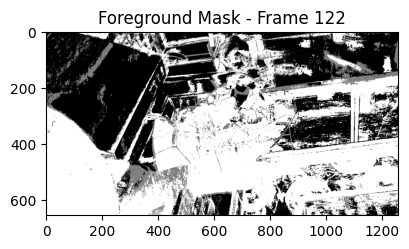

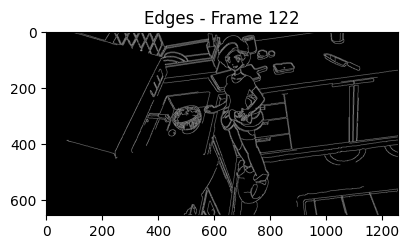

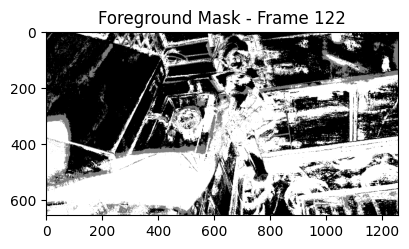

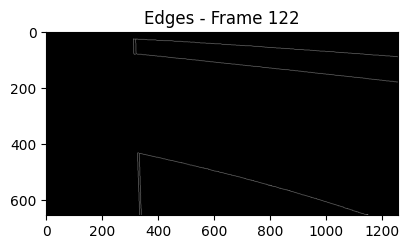

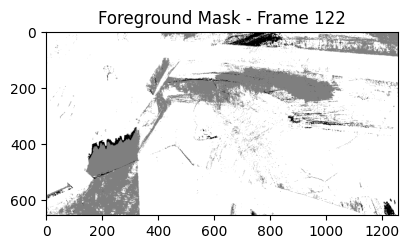

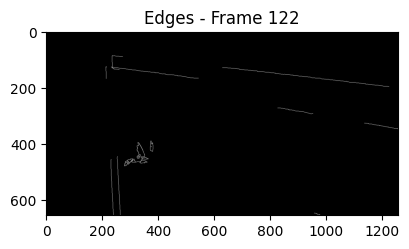

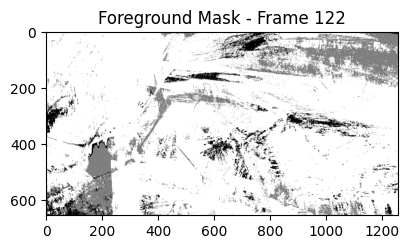

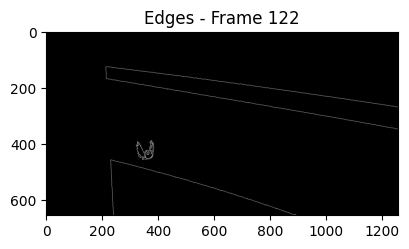

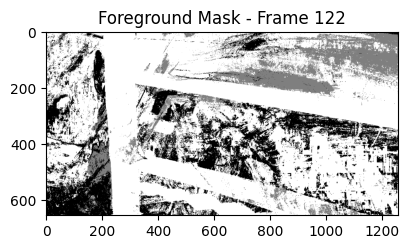

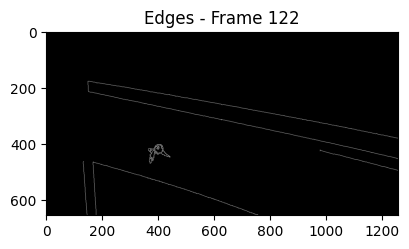

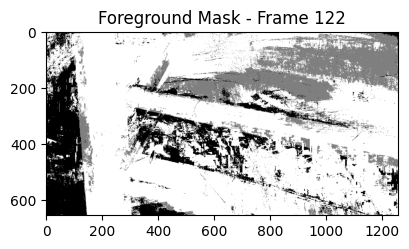

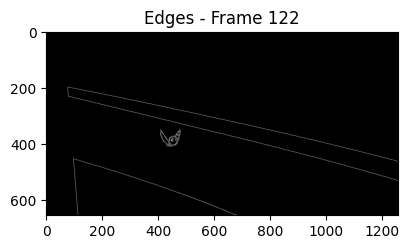

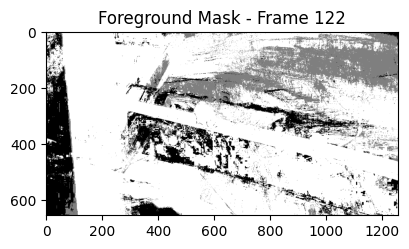

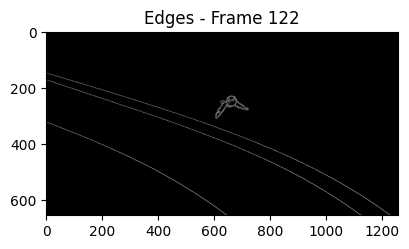

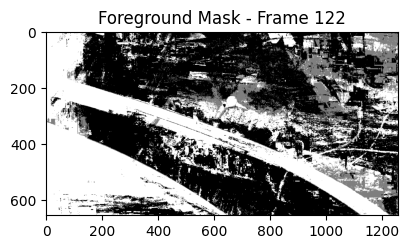

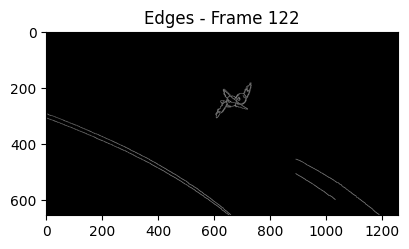

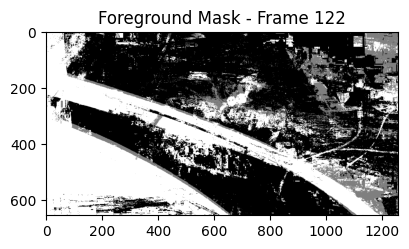

In [24]:
for af, ct, fi in fwc[:10]:
    ed, fm = seg[fi]
    print(f"{ct}")
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.title(f'Edges - Frame {i}')
    plt.imshow(ed, cmap='gray')
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,2)
    plt.title(f'Foreground Mask - Frame {i}')
    plt.imshow(fm, cmap='gray')